In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_birds=pd.read_csv("birds.csv")

In [3]:
df_birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


In [4]:
df_birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                443 non-null    object 
 1   ScientificName      443 non-null    object 
 2   Category            443 non-null    object 
 3   Order               443 non-null    object 
 4   Family              443 non-null    object 
 5   Genus               443 non-null    object 
 6   ConservationStatus  443 non-null    object 
 7   MinLength           443 non-null    float64
 8   MaxLength           443 non-null    float64
 9   MinBodyMass         443 non-null    float64
 10  MaxBodyMass         443 non-null    float64
 11  MinWingspan         443 non-null    float64
 12  MaxWingspan         443 non-null    float64
dtypes: float64(6), object(7)
memory usage: 45.1+ KB


In [13]:
total=df_birds.groupby("Order")["MinLength"].sum().reset_index()

In [14]:
total

,Order,MinLength
0,Accipitriformes,701.00
1,Anseriformes,2331.80
2,Apodiformes,86.20
3,Caprimulgiformes,90.00
4,Cathartiformes,118.00
5,Charadriiformes,2326.00
6,Ciconiiformes,83.00
7,Columbiformes,224.50
8,Coraciiformes,28.00
9,Cuculiformes,88.00


<BarContainer object of 21 artists>

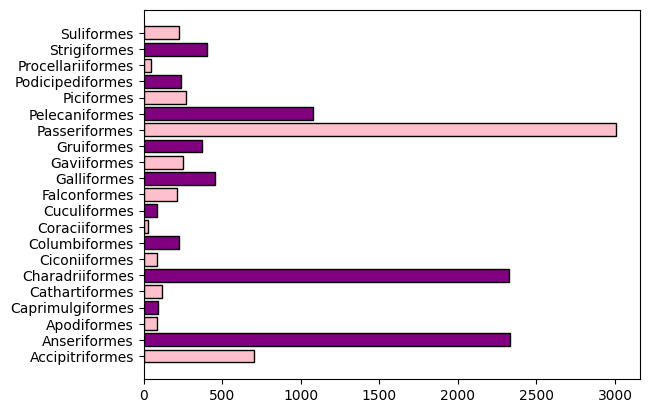

In [20]:
plt.barh(
    y=total.Order,
    width=total.MinLength,
    color=["pink","purple"],
    edgecolor="black"
)

In [31]:
birds_anatidae=df_birds.loc[df_birds["Family"]=="Anatidae"][["Family","MinLength"]]

In [40]:
birds_anatidae.head()

,Family,MinLength
0,Anatidae,47.0
1,Anatidae,45.0
2,Anatidae,64.0
3,Anatidae,57.3
4,Anatidae,64.0


<Axes: xlabel='MinLength', ylabel='Count'>

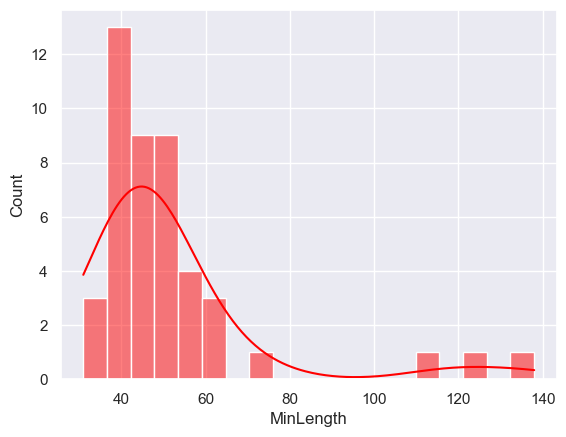

In [41]:
sns.set(style="darkgrid")
sns.histplot(data=birds_anatidae,
            x="MinLength",
            kde=True,
            color="red"
        )

<Figure size 1000x600 with 0 Axes>

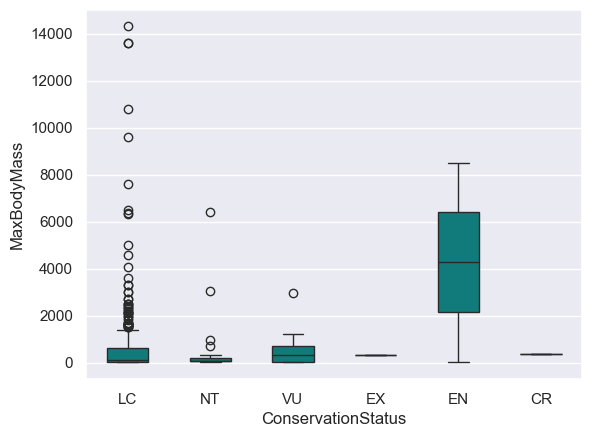

<Figure size 1000x600 with 0 Axes>

In [59]:
sns.set_theme(style="darkgrid")
sns.boxplot(
    x="ConservationStatus",
    y="MaxBodyMass",
    color="darkcyan",
    data=df_birds,
    width=0.5
)
plt.figure(figsize=(10,6))

In [60]:
df_birds["Family"].unique()

array(['Anatidae', 'Odontophoridae', 'Phasianidae', 'Podicipedidae',
       'Columbidae', 'Cuculidae', 'Caprimulgidae', 'Apodidae',
       'Trochilidae', 'Rallidae', 'Gruidae', 'Recurvirostridae',
       'Charadriidae', 'Scolopacidae', 'Stercorariidae', 'Alcidae',
       'Laridae', 'Gaviidae', 'Procellariidae', 'Ciconiidae',
       'Fregatidae', 'Phalacrocoracidae', 'Pelecanidae', 'Ardeidae',
       'Threskiornithidae', 'Cathartidae', 'Pandionidae', 'Accipitridae',
       'Tytonidae', 'Strigidae', 'Alcedinidae', 'Picidae', 'Falconidae',
       'Tyrannidae', 'Laniidae', 'Vireonidae', 'Corvidae', 'Alaudidae',
       'Hirundinidae', 'Paridae', 'Sittidae', 'Certhiidae',
       'Troglodytidae', 'Polioptilidae', 'Cinclidae', 'Regulidae',
       'Muscicapidae', 'Turdidae', 'Mimidae', 'Sturnidae',
       'Bombycillidae', 'Passeridae', 'Motacillidae', 'Fringillidae',
       'Calcariidae', 'Passerellidae', 'Icteridae', 'Parulidae',
       'Cardinalidae'], dtype=object)

<Axes: xlabel='MinLength', ylabel='MinBodyMass'>

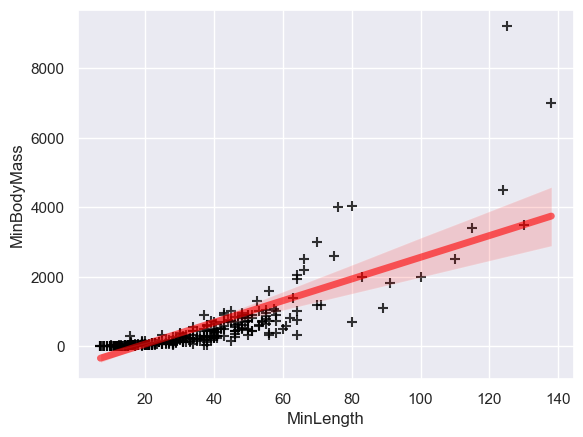

In [68]:
sns.regplot(
    x=df_birds["MinLength"],
    y=df_birds["MinBodyMass"],
    marker="+",
    line_kws={
        "color":"red",
        "alpha":0.6,
        "lw":5
    },
    scatter_kws={
        "color":"black",
        "s":50
    }

)

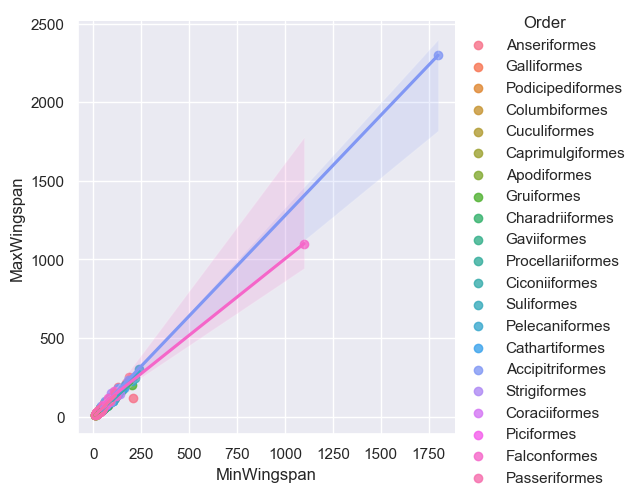

In [71]:
sns.lmplot(
    x="MinWingspan", 
    y="MaxWingspan",
    hue="Order",
    data=df_birds
)

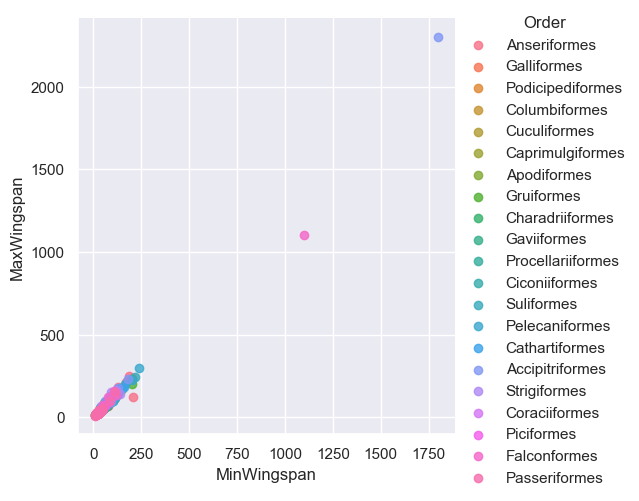

In [79]:
sns.lmplot(
    x="MinWingspan", 
    y="MaxWingspan",
    hue="Order",
    data=df_birds,
    fit_reg=False
)